### Outlier Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import pandas as pd
import numpy as np

src_path = Path.cwd().parent / "src"
sys.path.append(str(src_path))
from outliers import *

data_path = Path.cwd().parent / "data" / "processed" / "api_data_cleaned_merged.csv"
df = pd.read_csv(str(data_path))
df['CL=F_return'] = np.log(df['CL=F']/df['CL=F'].shift(1))



In [3]:
df

,Unnamed: 0,Date,CL=F,UUP,GLD,^VIX,^OVX,SHY,IEF,TIP,CL=F_return
0,0,2020-08-20,42.580002,22.342087,183.500000,22.719999,32.830002,77.537857,108.536964,104.350189,NaN
1,1,2020-08-21,42.340000,22.449070,182.029999,22.540001,33.680000,77.528900,108.617058,104.707382,-0.005652
2,2,2020-08-24,42.619999,22.484734,181.000000,22.370001,32.250000,77.519936,108.465836,104.915039,0.006591
3,3,2020-08-25,43.349998,22.404493,181.220001,22.030001,33.029999,77.528900,108.207924,104.881805,0.016983
4,4,2020-08-26,43.389999,22.377748,183.360001,23.270000,33.790001,77.528900,108.163422,105.089485,0.000922
...,...,...,...,...,...,...,...,...,...,...,...
1251,1251,2025-08-14,63.959999,27.430000,307.250000,14.830000,35.959999,82.699997,95.419998,110.250000,0.020694
1252,1252,2025-08-15,62.799999,27.340000,307.429993,15.090000,37.220001,82.669998,95.230003,110.040001,-0.018303
1253,1253,2025-08-18,63.419998,27.410000,306.950012,14.990000,32.150002,82.669998,95.139999,109.919998,0.009824
1254,1254,2025-08-19,62.349998,27.480000,305.269989,15.570000,33.040001,82.709999,95.379997,110.029999,-0.017016


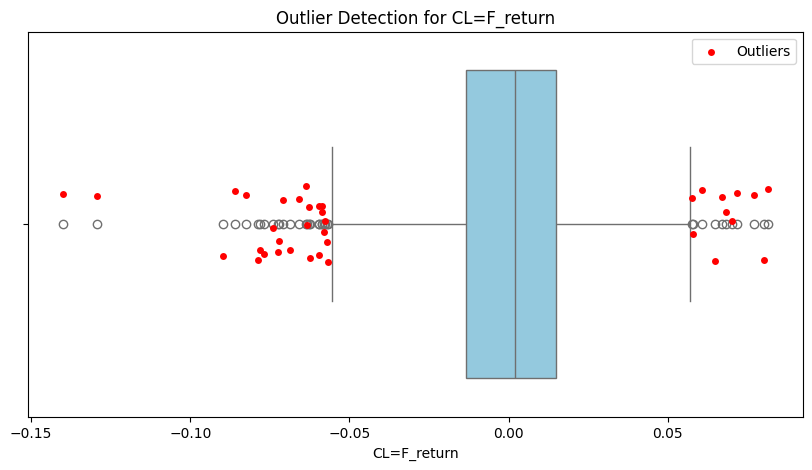

In [10]:
col = 'CL=F_return'  # Oil futures as example
mask_iqr = detect_outliers(df[col], method="iqr", threshold=1.5)

plt.figure(figsize=(10,5))
sns.boxplot(x=df[col], color="skyblue")
sns.stripplot(x=df[col][mask_iqr], color="red", label="Outliers")
plt.legend()
plt.title(f"Outlier Detection for {col}")
plt.show()


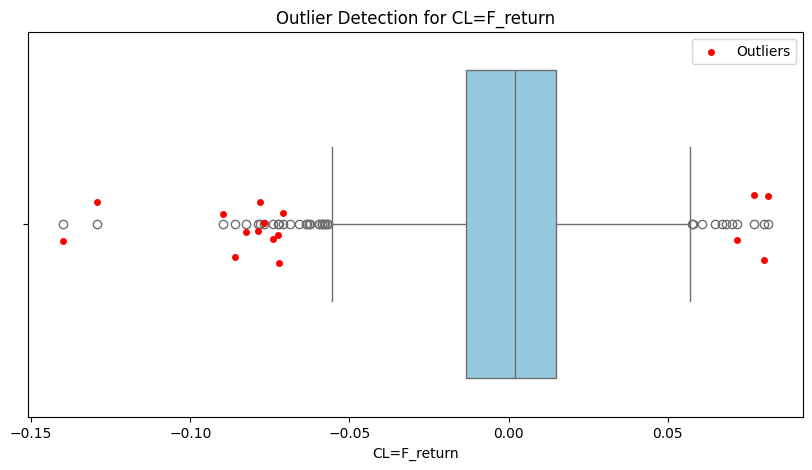

In [11]:
col = 'CL=F_return'  # Oil futures as example
mask_z = detect_outliers(df[col], method="zscore", threshold=3)

plt.figure(figsize=(10,5))
sns.boxplot(x=df[col], color="skyblue")
sns.stripplot(x=df[col][mask_z], color="red", label="Outliers")
plt.legend()
plt.title(f"Outlier Detection for {col}")
plt.show()